<h4 align="right">9th of March 2020</h4>
<h1 align="center">Neural Networks and Deep Learning (CIE 555)</h1>
<h2 align="center">Lab 6: Optimization</h2> <br>

# Different optimizers

![alt text](https://i.pinimg.com/originals/5d/51/66/5d5166a3d3712e7c03af74b1ccacbeac.gif)

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [0]:
mnist = tf.keras.datasets.mnist.load_data()

In [12]:
train, test = mnist
all_xtrain, all_Ytrain = train
xtrain = all_xtrain[:50000]
Ytrain = all_Ytrain[:50000]
xtest, Ytest = test
xtest = np.concatenate((xtest,all_xtrain[50000:]))
Ytest = np.concatenate((Ytest,all_Ytrain[50000:]))
xtrain = xtrain.reshape(-1,28*28) / 255
xtest = xtest.reshape(-1,28*28) / 255
print(xtrain.shape)
print(xtest.shape)

(50000, 784)
(20000, 784)


In [0]:
enc = OneHotEncoder(sparse = False,categories='auto')
ytrain = enc.fit_transform(Ytrain.reshape(-1, 1))
ytest = enc.transform(Ytest.reshape(-1, 1))

In [0]:
inp = layers.Input(shape=(xtrain.shape[1],))
x = layers.Dense(500, activation = tf.nn.relu, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(inp)
x = layers.Dense(125, activation = tf.nn.relu, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(x)
out = layers.Dense(10, activation=tf.nn.softmax, kernel_initializer = keras.initializers.glorot_uniform(seed=1))(x)

In [0]:
model1 = keras.Model(inp,out)
model2 = keras.Model(inp,out)
model3 = keras.Model(inp,out)
model4 = keras.Model(inp,out)

## Stochastic Gradient Descent (SGD)

Of the optimizers profiled here, stochastic gradient descent uses the least memory for a given batch size.

In [16]:
start1 = time.clock()
optimizer = tf.keras.optimizers.SGD(0.01)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history1 = model1.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end1 = time.clock() - start1

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 55us/sample - loss: 2.0545 - acc: 0.3853 - val_loss: 1.7651 - val_acc: 0.6369
Epoch 2/100
40000/40000 [==============================] - 2s 54us/sample - loss: 1.4970 - acc: 0.7104 - val_loss: 1.2569 - val_acc: 0.7632
Epoch 3/100
40000/40000 [==============================] - 2s 54us/sample - loss: 1.0694 - acc: 0.7883 - val_loss: 0.9291 - val_acc: 0.8078
Epoch 4/100
40000/40000 [==============================] - 2s 53us/sample - loss: 0.8208 - acc: 0.8218 - val_loss: 0.7472 - val_acc: 0.8328
Epoch 5/100
40000/40000 [==============================] - 2s 54us/sample - loss: 0.6797 - acc: 0.8442 - val_loss: 0.6399 - val_acc: 0.8458
Epoch 6/100
40000/40000 [==============================] - 2s 53us/sample - loss: 0.5923 - acc: 0.8568 - val_loss: 0.5709 - val_acc: 0.8560
Epoch 7/100
40000/40000 [==============================] - 2s 54us/sample - loss: 0.5334 - acc: 0.8676 - val_l

## Adagrad
individually adapts the learning rates of all model parameters by scaling them inversely proportional to the square root of the sum of all of their historical squared values

Empirically it has been found that—for training deep neural network models—the accumulation of squared gradients from the beginning of training can result in a premature and excessive decrease in the effective learning rate (stops the learning early).

In [17]:
start2 = time.clock()
optimizer = tf.keras.optimizers.Adagrad(0.01)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history2 = model2.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end2 = time.clock() - start2

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1545 - acc: 0.9568 - val_loss: 0.1947 - val_acc: 0.9425
Epoch 2/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.1512 - acc: 0.9575 - val_loss: 0.2005 - val_acc: 0.9422
Epoch 3/100
40000/40000 [==============================] - 2s 54us/sample - loss: 0.1485 - acc: 0.9579 - val_loss: 0.1885 - val_acc: 0.9460
Epoch 4/100
40000/40000 [==============================] - 2s 54us/sample - loss: 0.1453 - acc: 0.9588 - val_loss: 0.1853 - val_acc: 0.9458
Epoch 5/100
40000/40000 [==============================] - 2s 56us/sample - loss: 0.1427 - acc: 0.9603 - val_loss: 0.1806 - val_acc: 0.9468
Epoch 6/100
40000/40000 [==============================] - 2s 56us/sample - loss: 0.1397 - acc: 0.9611 - val_loss: 0.1809 - val_acc:

## RMSprop

In [18]:
start3 = time.clock()
optimizer = tf.keras.optimizers.RMSprop(0.01)
model3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history3 = model3.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end3 = time.clock() - start3

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 62us/sample - loss: 2.2762 - acc: 0.8030 - val_loss: 0.3581 - val_acc: 0.8984
Epoch 2/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.2326 - acc: 0.9317 - val_loss: 0.3839 - val_acc: 0.9001
Epoch 3/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1500 - acc: 0.9562 - val_loss: 0.1758 - val_acc: 0.9515
Epoch 4/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.1142 - acc: 0.9668 - val_loss: 0.2368 - val_acc: 0.9402
Epoch 5/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.0923 - acc: 0.9731 - val_loss: 0.6541 - val_acc: 0.8817
Epoch 6/100
40000/40000 [==============================] - 2s 60us/sample - loss: 0.0773 - acc: 0.9778 - val_loss: 0.2841 - val_acc: 0.9411
Epoch 7/100
40000/40000 [==============================] - 2s 59us/sample - loss: 0.0633 - acc: 0.9816 - val_l

## Adam

In [19]:
start4 = time.clock()
optimizer = tf.keras.optimizers.Adam(0.01)
model4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
epochs = 100
history4 = model4.fit(xtrain, ytrain, batch_size = 512, epochs = epochs, validation_split = 0.2, verbose = True)
end4 = time.clock() - start2

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 2s 58us/sample - loss: 0.0579 - acc: 0.9972 - val_loss: 1.4745 - val_acc: 0.9721
Epoch 2/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.0747 - acc: 0.9958 - val_loss: 1.1917 - val_acc: 0.9721
Epoch 3/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.0522 - acc: 0.9969 - val_loss: 1.2358 - val_acc: 0.9726
Epoch 4/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.0869 - acc: 0.9953 - val_loss: 1.4470 - val_acc: 0.9677
Epoch 5/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.0633 - acc: 0.9958 - val_loss: 1.2356 - val_acc: 0.9713
Epoch 6/100
40000/40000 [==============================] - 2s 55us/sample - loss: 0.0427 - acc: 0.9965 - val_loss: 1.0212 - val_acc: 0.9725
Epoch 7/100
40000/40000 [==============================] - 2s 56us/sample - loss: 0.0329 - acc: 0.9973 - val_l

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Loss')
  #plt.ylim([0.4,1.2])
  plt.legend()

In [0]:
def plot_historyAcc(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'],
           label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Val Accuracy')
  plt.ylim([0.4,1.2])
  plt.legend()

Using SGD, time consumed is 370.229994 seconds


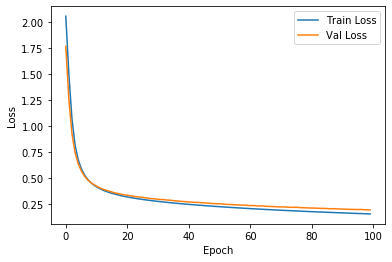

In [22]:
plot_history(history1)
print("Using SGD, time consumed is " + str(end1) + " seconds")

train accuracy is 0.95635Validation accuracy is: 0.9422


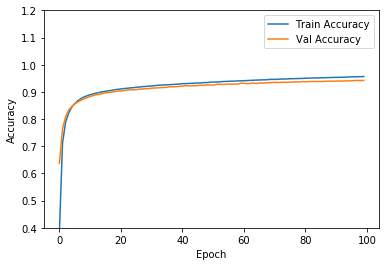

In [23]:
plot_historyAcc(history1)
print("train accuracy is " + str(history1.history['acc'][-1]) + "Validation accuracy is: " + str(history1.history['val_acc'][-1]))

Using Adagrad, time consumed is 379.6304460000001 seconds


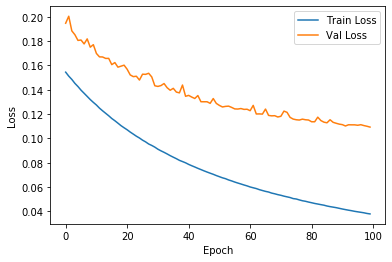

In [24]:
plot_history(history2)
print("Using Adagrad, time consumed is " + str(end2) + " seconds")

train accuracy is 0.9923Validation accuracy is: 0.9665


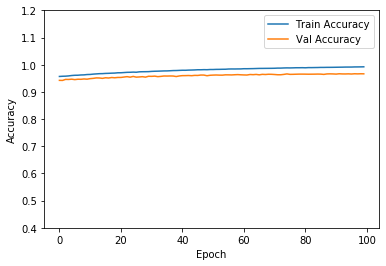

In [25]:
plot_historyAcc(history2)
print("train accuracy is " + str(history2.history['acc'][-1]) + "Validation accuracy is: " + str(history2.history['val_acc'][-1]))

Using RMSprop, time consumed is 413.94405200000006 seconds


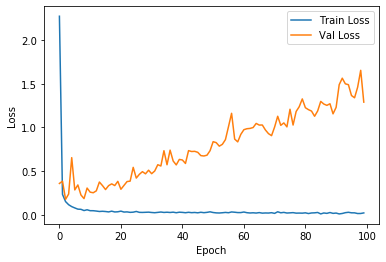

In [26]:
plot_history(history3)
print("Using RMSprop, time consumed is " + str(end3) + " seconds")

train accuracy is 0.99875Validation accuracy is: 0.9747


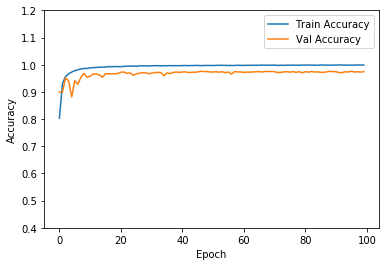

In [27]:
plot_historyAcc(history3)
print("train accuracy is " + str(history3.history['acc'][-1]) + "Validation accuracy is: " + str(history3.history['val_acc'][-1]))

Using Adam, time consumed is 1180.811281 seconds


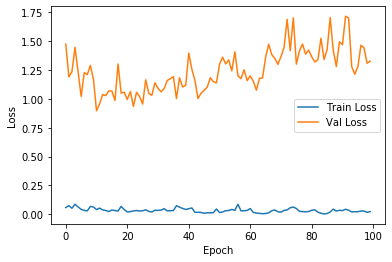

In [28]:
plot_history(history4)
print("Using Adam, time consumed is " + str(end4) + " seconds")

train accuracy is 0.99805Validation accuracy is: 0.9739


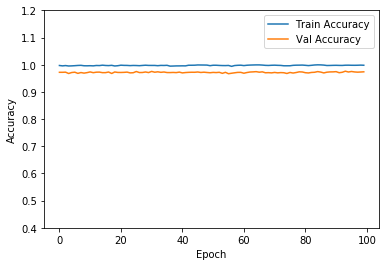

In [29]:
plot_historyAcc(history4)
print("train accuracy is " + str(history4.history['acc'][-1]) + "Validation accuracy is: " + str(history4.history['val_acc'][-1]))

# Hyperparameter tuning

When designing the architecture for an artificial neural network, there exist a variety of parameters that can be tuned. It is indeed an art in itself to find the right combination for these parameters to achieve the highest accuracy. 

Talos was released on May 11, 2018 and has since been upgraded seven times. It works for Python 2 and Python 3, and follows a POD (Prepare, Optimize, Deploy) workflow, to create a flexible and efficient pipeline with state-of-the-art prediction results. When running the code with Talos in the scan-command, all possible combinations are tested in one experiment. The best model is then saved and can be applied just like if you made a neural network using Keras.

<img src='https://raw.githubusercontent.com/autonomio/hyperio/master/logo.png' width=250px>

In [10]:
!pip install talos

     |████████████████████████████████| 61kB 3.0MB/s 
     |████████████████████████████████| 109.2MB 85kB/s 
     |████████████████████████████████| 378kB 46.3MB/s 
     |████████████████████████████████| 8.7MB 42.9MB/s 
     |████████████████████████████████| 839kB 37.1MB/s 
     |████████████████████████████████| 3.2MB 41.0MB/s 
     |████████████████████████████████| 491kB 50.9MB/s 
  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-cp36-none-any.whl size=3601 sha256=f8fbe0a141d5eb5256ae1a22d5004fab09b9fe0b1d9604d847f506c6f23774ef
  Stored in directory: /root/.cache/pip/wheels/9d/d3/8c/9503a22b0a38e8b21c70ad834e4606d209193443e5c709305d
  Created wheel for astetik: filename=astetik-1.9.9-cp36-none-any.whl size=56960 sha256=95d13c0eda4a99242d68b4ec9c8000c29a25a86c4179ab903f7615eb9cd917be
  Stored in directory: /root/.cache/pip/wheels/ae/70/21/c475cd079ec401dd6e1b9b1d42b4c38554ce12679bfb214aad
  Created wheel for chances: filename=chances-0.1.9-cp36-none-any.whl size=41609 

## **RESTART RUNTIME NOW**

In [1]:
import talos
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


## Table of Contents

##### 1. <a href=#one>Data Preparation</a>
##### 2. <a href=#two>Model Preparation</a>
##### 3. <a href=#three>Setting the Parameter Space Boundaries</a>
##### 4. <a href=#four>Run the Hyperparameter <code>Scan()</code></a>
##### 5. <a href=#five>Access the results through the <code>Scan</code> object</a>
##### 6. <a href=#six>Analysing the Scan results with <code>Reporting()</code></a>
##### 7. <a href=#seven>Evaluating Models with <code>Evaluate()</code></a>
##### 8. <a href=#eight>Deploying Models with <code>Deploy()</code></a>
##### 9. <a href=#nine>Restoring Models with <code>Restore()</code></a>

### 1. Data Preparation <a name="one"></a> 

For this experiment, we're going to use the famous Iris dataset. 

In [0]:
x, y = talos.templates.datasets.iris()

### 2. Model Preparation  <a name="two"></a> 
Talos works with any Keras model, without changing the structure of the model in anyway, or without introducing any new syntax. The below example shows clearly how this works. 

For this example, we have to import two helper functions from Talos, one for early stopping callout, and the other for using normalized learning rate values. Because we might want to work on trying out several optimizers in a single scan, without normalization, inputting of the values would become cumbersome.

In [0]:
from talos.utils import lr_normalizer

Note that the only difference in the model below is how instead of using a label or value to define a given model parameter, we do it using a dictionary label. Also for optimizer we are using a learning rate parameter, which involves the use of two dictionary labels.

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

def iris_model(x_train, y_train, x_val, y_val, params):
    
    model = Sequential()                            
    model.add(Dense(params['first_neuron'],
                    input_dim=x_train.shape[1],
                    activation='relu'))
    
    model.add(Dropout(params['dropout']))
    model.add(Dense(y_train.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])
    
    return out, model

### 3. Setting the Parameter Space Boundaries <a name="three"></a> 
In the last and final step, we're going to create the dictionary, which will then be passed on to Talos together with the model above. Here we have three different ways to input values:

- as stepped ranges (min, max, steps)
- as multiple values [in a list]
- as a single value [in a list]

For values we don't want to use, it's ok to set it as None.

NOTE: at this point you have to import from Keras the optimizer, activations, and losses you want to scan for.

In [0]:
from keras.optimizers import Adam, SGD
from keras.activations import softmax
from keras.losses import categorical_crossentropy, logcosh

p = {'lr': (0.1, 10, 10),
     'first_neuron':[4, 8, 16, 32, 64, 128],
     'batch_size': [2, 3, 4],
     'epochs': [200],
     'dropout': (0, 0.40, 10),
     'optimizer': [Adam, SGD],
     'loss': ['categorical_crossentropy'],
     'last_activation': ['softmax'],
     'weight_regulizer': [None]}

### 4. Run the Hyperparameter <code>Scan()</code> <a name="four"></a> 
The experiment is configured and started through the Scan() command. All of the options effecting the experiment, other than the hyperparameters themselves, are configured through the Scan arguments.

Now we are ready to run the model based on the parameters and the layer configuration above. The exact same process would apply with any other model, just make sure to pass the model function name in the Scan() command as in the below example. To get started quickly, we're going to invoke the 'grid_downsample' parameter to 1/100 of the entire permutations.

In [36]:
scan_object = talos.Scan(x,
                         y, 
                         params=p,
                         model=iris_model,
                         experiment_name='iris',
                         fraction_limit=.01)


  0%|          | 0/36 [00:00<?, ?it/s]

100%|██████████| 36/36 [06:07<00:00,  9.28s/it]


### 5. Access the results through the <code>Scan</code> object <a name="five"></a> 

In [37]:
# accessing the results data frame
scan_object.data.head()

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,200,0.091043,1.000000,0.209592,0.933333,2,0.12,200,32,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.SGD'>,None
1,200,0.061153,0.977778,0.143915,0.942857,2,0.24,200,32,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.SGD'>,None
2,200,0.030737,0.977778,0.119952,0.952381,4,0.28,200,64,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.Adam'>,None
3,200,0.052952,0.977778,0.084111,0.971429,2,0.16,200,64,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.Adam'>,None
4,200,0.431484,0.711111,0.480609,0.638095,2,0.08,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.SGD'>,None


In [38]:
# access the summary details
scan_object.details

experiment_name                    iris
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            03/09/20/11:50
x_shape                        (150, 4)
y_shape                        (150, 3)
dtype: object

In addition to statistics and meta-data related with the Scan, the used data (x and y) together with the saved model and model weights for each hyperparameter permutation is stored in the Scan object. 

In [39]:
# accessing the saved models
scan_object.saved_models

['{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "batch_input_shape": [null, 4], "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.12, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_2", "trainable": true, "dtype": "float32", "units": 3, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribu

In [40]:
# accessing the saved weights for models
scan_object.saved_weights

[[array([[-2.21500412e-01, -3.40545177e-02, -2.08691955e-02,
          -3.17717171e+00, -3.74957561e-01,  1.12698448e+00,
          -2.92866170e-01, -2.57512927e+00, -6.35762364e-02,
          -1.70489222e-01,  3.15605015e-01, -7.35735148e-02,
          -1.12893015e-01, -1.92750484e-01, -1.94107026e-01,
          -3.51279110e-01, -2.66560197e-01, -3.92762572e-01,
           2.44985104e-01, -3.94947618e-01,  4.87393320e-01,
          -1.21007574e+00, -2.28413790e-01,  2.99972475e-01,
          -1.31121516e-01,  1.20392418e+00,  4.64007735e-01,
          -2.35173985e-01, -2.03428999e-01, -1.15126681e+00,
          -3.44425827e-01, -8.02132010e-01],
         [-9.89118218e-03, -9.84418392e-02, -6.97012544e-02,
          -3.06321859e+00,  1.48684859e-01,  1.23658049e+00,
          -1.13251686e-01, -1.89409816e+00, -1.35543764e-01,
          -9.47019756e-02,  1.17889535e+00, -3.79367620e-01,
          -2.47033060e-01,  2.47565746e-01, -8.22823644e-02,
          -3.27977538e-01, -4.30779755e-

The Scan object can be further used, and is required, as input for Predict(), Evaluate(), and Deploy(). More about this in the corresponding sections below.

### 6. Analysing the Scan results with <code>Reporting()</code> <a name="six"></a> 

In the Scan process, the results are stored round-by-round in the corresponding experiment log which is a .csv file stored in the present working directory. The Reporting() accepts as its source either a file name, or the Scan object. 

In [0]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)


In [42]:
# access the dataframe with the results
analyze_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer
0,200,0.091043,1.000000,0.209592,0.933333,2,0.12,200,32,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.SGD'>,None
1,200,0.061153,0.977778,0.143915,0.942857,2,0.24,200,32,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.SGD'>,None
2,200,0.030737,0.977778,0.119952,0.952381,4,0.28,200,64,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.Adam'>,None
3,200,0.052952,0.977778,0.084111,0.971429,2,0.16,200,64,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.Adam'>,None
4,200,0.431484,0.711111,0.480609,0.638095,2,0.08,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.SGD'>,None
5,200,0.062487,1.000000,0.270235,0.895238,2,0.28,200,8,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.Adam'>,None
6,200,0.277688,0.955556,0.478942,0.819048,3,0.24,200,8,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.SGD'>,None
7,200,0.058934,0.977778,0.096170,0.952381,2,0.16,200,128,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,None
8,200,0.131316,0.955556,0.262003,0.885714,2,0.16,200,8,softmax,categorical_crossentropy,1.09,<class 'keras.optimizers.SGD'>,None
9,200,0.514874,0.844444,0.606492,0.638095,4,0.20,200,8,softmax,categorical_crossentropy,0.10,<class 'keras.optimizers.Adam'>,None


In [43]:
# get the number of rounds in the Scan
analyze_object.rounds()

36

In [44]:
# get the highest result for any metric
analyze_object.high('val_acc')

1.0

In [45]:
# get the round with the best result
analyze_object.rounds2high('val_acc')

0

In [46]:
# get the best paramaters
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])

array([[<class 'keras.optimizers.SGD'>, 7.03, 2, None, 32, 'softmax',
        200, 200, 0.12, 0],
       [<class 'keras.optimizers.Adam'>, 2.08, 3, None, 8, 'softmax',
        200, 200, 0.24, 1],
       [<class 'keras.optimizers.Adam'>, 7.03, 4, None, 8, 'softmax',
        200, 200, 0.08, 2],
       [<class 'keras.optimizers.Adam'>, 0.1, 2, None, 128, 'softmax',
        200, 200, 0.08, 3],
       [<class 'keras.optimizers.Adam'>, 9.01, 4, None, 16, 'softmax',
        200, 200, 0.12, 4],
       [<class 'keras.optimizers.Adam'>, 9.01, 3, None, 64, 'softmax',
        200, 200, 0.16, 5],
       [<class 'keras.optimizers.Adam'>, 4.0600000000000005, 2, None, 8,
        'softmax', 200, 200, 0.28, 6],
       [<class 'keras.optimizers.SGD'>, 6.04, 3, None, 16, 'softmax',
        200, 200, 0.04, 7],
       [<class 'keras.optimizers.Adam'>, 9.01, 4, None, 64, 'softmax',
        200, 200, 0.24, 8],
       [<class 'keras.optimizers.SGD'>, 0.1, 4, None, 64, 'softmax', 200,
        200, 0.28, 9]], dt

In addition to the key obsevations, several useful plots are available for analysis of the results.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


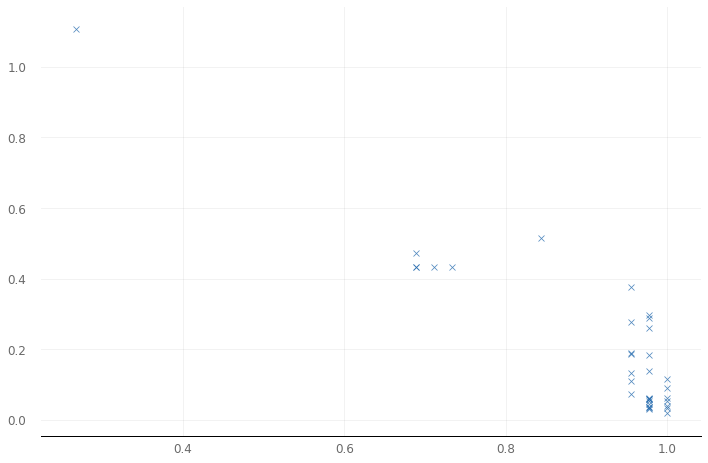

In [47]:
# a regression plot for two dimensions 
analyze_object.plot_regs('val_acc', 'val_loss')

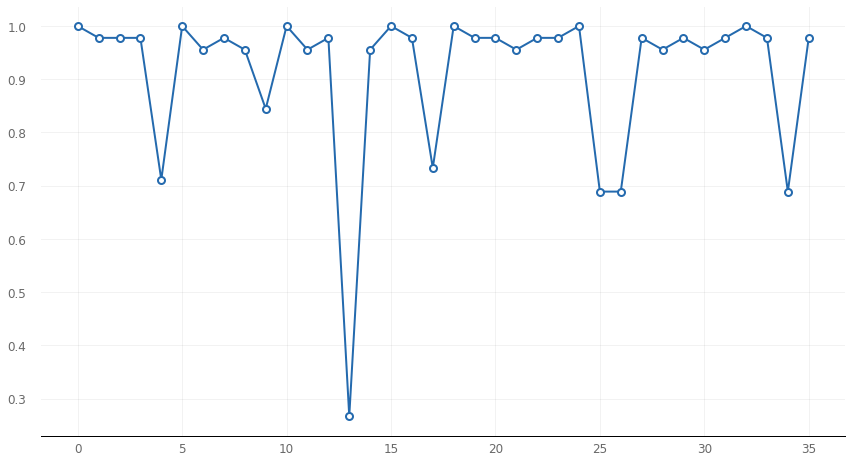

In [48]:
# line plot
analyze_object.plot_line('val_acc')

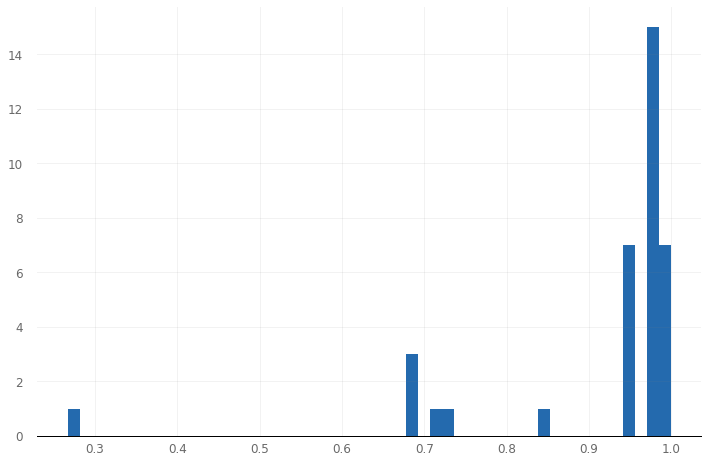

In [49]:
# a simple histogram
analyze_object.plot_hist('val_acc', bins=50)

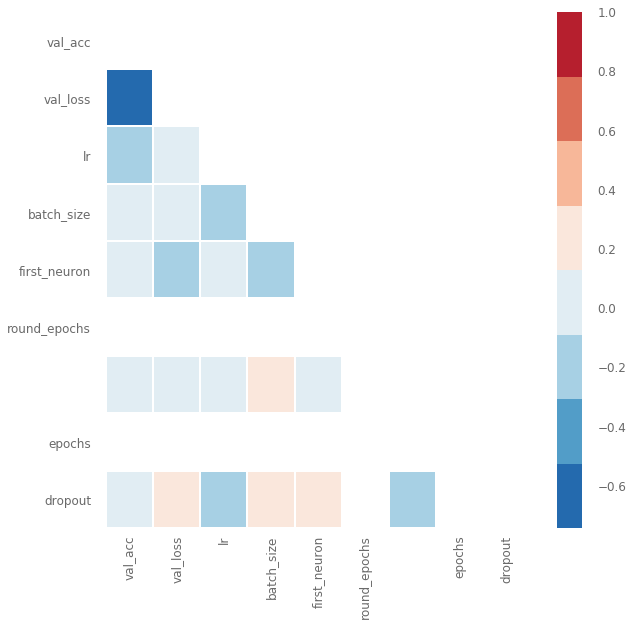

In [50]:
# heatmap correlation
analyze_object.plot_corr('val_loss', ['acc', 'loss', 'val_loss'])

### 7. Evaluating Models with <code>Evaluate()</code> <a name="seven"></a> 

Models can be evaluated with <code>Evaluate()</code> against a k-fold cross-validation. Ideally at least 50% of the data, or more if possible, is kept completely out of the <code>Scan</code> process and only exposed into Evaluate once one or more candidate models have been identified.

In [51]:
evaluate_object = talos.Evaluate(scan_object)
evaluate_object.evaluate(x, y, folds=10, metric='val_acc', task='multi_label')

[1.0,
 1.0,
 0.9153439153439153,
 0.9500891265597149,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9373219373219372]

Once a sufficiently performing model have been found, a deployment package can be easily created.

### 8. Deploying Models with <code>Deploy()</code> <a name="eight"></a> 

Once the right model or models have been found, you can create a deployment package with <code>Deploy()</code> which is then easy to transfer to a production or other environment, send via email, or upload to shared remote location. Best model is automatically chosen based on a given metric ('val_acc' by default).

The Deploy package is a zip file that consist of: 

- details of the scan
- model weights
- model json
- results of the experiment
- sample of x data
- sample of y data

The <code>Deploy</code> package can be easily restored with <code>Restore()</code> which is covered in the next section.

In [52]:
talos.Deploy(scan_object=scan_object, model_name='iris_deploy', metric='val_acc');

Deploy package iris_deploy have been saved.


### 9. Restoring Models with <code>Restore()</code> <a name="nine"></a> 

In [0]:
iris = talos.Restore('iris_deploy.zip')

The <code>Restore</code> object now consists of the assets from the Scan object originally associated with the experiment, together with the model that had been picked as 'best'. The model can be immediately used for making prediction, or use in any other other way Keras model objects can be used.

In [54]:
# make predictions with the model
model = iris.model
model.predict(x)

array([[9.99999881e-01, 9.58548299e-08, 9.96925431e-10],
       [3.14141903e-03, 8.36760044e-01, 1.60098583e-01],
       [3.53596103e-03, 8.43740344e-01, 1.52723730e-01],
       [1.20069052e-10, 1.21756399e-03, 9.98782456e-01],
       [1.00000000e+00, 8.00346989e-09, 5.96193372e-11],
       [6.80879981e-04, 6.53655112e-01, 3.45664024e-01],
       [3.14141903e-03, 8.36760044e-01, 1.60098583e-01],
       [3.30098304e-09, 5.26037812e-03, 9.94739592e-01],
       [4.15765308e-03, 8.52865636e-01, 1.42976701e-01],
       [6.16255136e-08, 1.90459527e-02, 9.80953932e-01],
       [1.26913164e-06, 7.04348013e-02, 9.29563940e-01],
       [3.52279888e-03, 8.43524814e-01, 1.52952403e-01],
       [3.14141903e-03, 8.36760044e-01, 1.60098583e-01],
       [3.14141903e-03, 8.36760044e-01, 1.60098583e-01],
       [9.99998927e-01, 1.06303128e-06, 1.48908175e-08],
       [9.18158776e-08, 2.26718225e-02, 9.77328062e-01],
       [9.99998450e-01, 1.53519989e-06, 2.33843913e-08],
       [1.28940144e-06, 7.09099

In [55]:
# get the hyperparameter space boundary
iris.params

{'batch_size': [2, 3, 4],
 'dropout': (0, 0.4, 10),
 'epochs': [200],
 'first_neuron': [4, 8, 16, 32, 64, 128],
 'last_activation': ['softmax'],
 'loss': ['categorical_crossentropy'],
 'lr': (0.1, 10, 10),
 'optimizer': [keras.optimizers.Adam, keras.optimizers.SGD],
 'weight_regulizer': [None]}

In [56]:
# sample of x and y data
iris.x
iris.y

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
95,1.0,0.0,0.0
96,0.0,0.0,1.0
97,0.0,1.0,0.0
98,0.0,1.0,0.0


In [57]:
# the results dataframe
iris.results

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss.1,lr,optimizer,weight_regulizer,Unnamed: 15
0,200,0.091043,1.000000,0.209592,0.933333,2,0.12,200,32,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.SGD'>,NaN,0
1,200,0.061153,0.977778,0.143915,0.942857,2,0.24,200,32,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.SGD'>,NaN,1
2,200,0.030737,0.977778,0.119952,0.952381,4,0.28,200,64,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.Adam'>,NaN,2
3,200,0.052952,0.977778,0.084111,0.971429,2,0.16,200,64,softmax,categorical_crossentropy,7.03,<class 'keras.optimizers.Adam'>,NaN,3
4,200,0.431484,0.711111,0.480609,0.638095,2,0.08,200,128,softmax,categorical_crossentropy,9.01,<class 'keras.optimizers.SGD'>,NaN,4
5,200,0.062487,1.000000,0.270235,0.895238,2,0.28,200,8,softmax,categorical_crossentropy,4.06,<class 'keras.optimizers.Adam'>,NaN,5
6,200,0.277688,0.955556,0.478942,0.819048,3,0.24,200,8,softmax,categorical_crossentropy,6.04,<class 'keras.optimizers.SGD'>,NaN,6
7,200,0.058934,0.977778,0.096170,0.952381,2,0.16,200,128,softmax,categorical_crossentropy,8.02,<class 'keras.optimizers.Adam'>,NaN,7
8,200,0.131316,0.955556,0.262003,0.885714,2,0.16,200,8,softmax,categorical_crossentropy,1.09,<class 'keras.optimizers.SGD'>,NaN,8
9,200,0.514874,0.844444,0.606492,0.638095,4,0.20,200,8,softmax,categorical_crossentropy,0.10,<class 'keras.optimizers.Adam'>,NaN,9


# Exercise

Use talos hyperparameter optimization to search for the best model parameters to use for California housing dataset. 


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [0]:
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [0]:
dataset = fetch_california_housing()

In [5]:
xtrain, xval, ytrain, yval = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 1)
ytrain = ytrain.reshape([-1,1])
yval = yval.reshape([-1,1])
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)


(16512, 8)
(4128, 8)
(16512, 1)
(4128, 1)


'### To be Done ###'

Define your model here and search for the best hyperparameters to use using talos. 

Report the parameters of the best model and its validation accuracy

In [0]:
def california_model(xtrain, ytrain, xval, yval, params):
    
    model = Sequential()                            
    model.add(Dense(params['first_neuron'],
                    input_dim=xtrain.shape[1],
                    activation='relu'))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(ytrain.shape[1],
                    activation=params['last_activation']))

    model.compile(optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                  loss=params['loss'],
                  metrics=['acc'])

    out = model.fit(xtrain, ytrain,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[xval, yval])
    
    return out, model

In [0]:
from keras.optimizers import Adam, SGD

p = {'lr': (0.001, 1, 5),
     'first_neuron':[50, 100, 200],
     'batch_size': [32,64],
     'epochs': [100],
     'dropout': [0, 0.5, 5],
     'optimizer': [Adam],
     'loss': ['mean_squared_error'],
     'last_activation': [None],
     'weight_regulizer': [None]}

In [17]:
scan_object = talos.Scan(xtrain,
                         ytrain, 
                         params=p,
                         model=california_model,
                         experiment_name='Cal')





  0%|          | 0/90 [00:00<?, ?it/s]




  1%|          | 1/90 [00:43<1:04:47, 43.69s/it]


  2%|▏         | 2/90 [01:27<1:04:17, 43.84s/it]


  3%|▎         | 3/90 [02:12<1:04:01, 44.15s/it]


  4%|▍         | 4/90 [02:57<1:03:19, 44.18s/it]


  6%|▌         | 5/90 [03:43<1:03:29, 44.82s/it]


  7%|▋         | 6/90 [04:28<1:02:41, 44.78s/it]


  8%|▊         | 7/90 [05:12<1:01:42, 44.60s/it]


  9%|▉         | 8/90 [05:56<1:00:56, 44.59s/it]


 10%|█         | 9/90 [06:41<1:00:25, 44.76s/it]


 11%|█         | 10/90 [07:27<59:49, 44.86s/it] 


 12%|█▏        | 11/90 [08:12<59:24, 45.13s/it]


 13%|█▎        | 12/90 [08:57<58:41, 45.14s/it]


 14%|█▍        | 13/90 [09:43<57:59, 45.18s/it]


 16%|█▌        | 14/90 [10:28<57:13, 45.18s/it]


 17%|█▋        | 15/90 [11:13<56:29, 45.19s/it]


 18%|█▊        | 16/90 [12:01<56:43, 45.99s/it]


 19%|█▉        | 17/90 [12:49<56:46, 46.67s/it]


 20%|██        | 18/90 [13:36<56:04, 46.73s/it]


 21%|██        | 19/90 [14:23<55:30, 46.91s/it]


 22%|██▏       | 20/90 [15:10<54:45, 

In [19]:
# use Scan object as input
analyze_object = talos.Analyze(scan_object)
analyze_object.data

,round_epochs,val_loss,val_acc,loss,acc,batch_size,dropout,epochs,first_neuron,last_activation,loss,lr,optimizer,weight_regulizer,NaN
0,100,21.229249,0.001615,59.710693,0.001644,32,0.0,100,50,None,mean_squared_error,0.0010,<class 'keras.optimizers.Adam'>,None,0
1,100,0.757774,0.004037,0.656649,0.003807,32,0.0,100,50,None,mean_squared_error,0.2008,<class 'keras.optimizers.Adam'>,None,1
2,100,0.590084,0.004037,0.709618,0.003201,32,0.0,100,50,None,mean_squared_error,0.4006,<class 'keras.optimizers.Adam'>,None,2
3,100,0.600644,0.004037,3.184174,0.003461,32,0.0,100,50,None,mean_squared_error,0.6004,<class 'keras.optimizers.Adam'>,None,3
4,100,0.611911,0.003835,0.983959,0.004066,32,0.0,100,50,None,mean_squared_error,0.8002,<class 'keras.optimizers.Adam'>,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,100,19.149050,0.000606,17.995438,0.000173,64,5.0,100,200,None,mean_squared_error,0.0010,<class 'keras.optimizers.Adam'>,None,85
86,100,0.568510,0.004441,0.933073,0.003720,64,5.0,100,200,None,mean_squared_error,0.2008,<class 'keras.optimizers.Adam'>,None,86
87,100,0.505127,0.005248,1.049412,0.003288,64,5.0,100,200,None,mean_squared_error,0.4006,<class 'keras.optimizers.Adam'>,None,87
88,100,0.631242,0.004239,1.144949,0.003115,64,5.0,100,200,None,mean_squared_error,0.6004,<class 'keras.optimizers.Adam'>,None,88


In [20]:
analyze_object.best_params('val_acc', ['acc', 'loss', 'val_loss'])


array([[None, None, 64, 200, 0.4006, 5.0,
        <class 'keras.optimizers.Adam'>, 100, 100, 87, 0],
       [None, None, 64, 50, 0.6004, 5.0, <class 'keras.optimizers.Adam'>,
        100, 100, 78, 1],
       [None, None, 32, 200, 0.6004, 0.5,
        <class 'keras.optimizers.Adam'>, 100, 100, 28, 2],
       [None, None, 64, 200, 0.4006, 0.0,
        <class 'keras.optimizers.Adam'>, 100, 100, 57, 3],
       [None, None, 64, 200, 0.6004, 0.5,
        <class 'keras.optimizers.Adam'>, 100, 100, 73, 4],
       [None, None, 64, 100, 0.2008, 5.0,
        <class 'keras.optimizers.Adam'>, 100, 100, 81, 5],
       [None, None, 64, 100, 0.6004, 5.0,
        <class 'keras.optimizers.Adam'>, 100, 100, 83, 6],
       [None, None, 64, 100, 0.6004, 0.5,
        <class 'keras.optimizers.Adam'>, 100, 100, 68, 7],
       [None, None, 64, 100, 0.2008, 0.5,
        <class 'keras.optimizers.Adam'>, 100, 100, 66, 8],
       [None, None, 64, 50, 0.4006, 5.0, <class 'keras.optimizers.Adam'>,
        100, 100, 

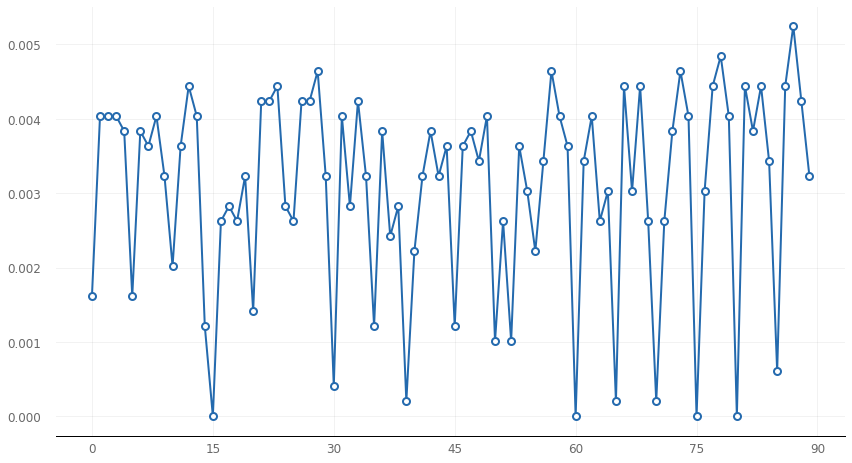

In [21]:

# line plot
analyze_object.plot_line('val_acc')